In [38]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Settings & Consts

Core files for analysis are those pointing to the ASD rates.

In [2]:
# Core

ADDM = '../processed-spatial/asd/addm_asd_by_state.json'
MEDI = '../processed-spatial/asd/medi_asd_by_state.json'
NSCH = '../processed-spatial/asd/nsch_asd_by_state.json'
SPED = '../processed-spatial/asd/sped_asd_by_state.json'

Environmental & Biological factors

In [3]:
LEAD = '../processed-spatial/lead/lead_by_state.json'
LYME = '../processed-spatial/lymedisease/lyme_disease_by_state.json'
OPIO = '../processed-spatial/drugs/opioids_deaths_by_state.json'

Socio-economic Factors

In [4]:
ECON = '../processed-spatial/economic/income_jobs_by_state.json'

We have prepared all files, now we take a look into each one of those and we are going to clean a data a little bit.

# Data cleaning and pre-processing

In [8]:
# Set dict with core datasets

core = {}

## (Core) ADDM

Source & Methodology: https://www.cdc.gov/ncbddd/autism/addm-community-report/addm-network-methods.html

In [5]:
c_addm = gpd.read_file(ADDM)
c_addm.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,Denominator-2000,...,Prevalence-2002,Prevalence-2004,Prevalence-2006,Prevalence-2008,Prevalence-2010,Prevalence-2012,Prevalence-2014,Prevalence-2016,Prevalence-2018,geometry
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,NaN,...,6.5,8.7,10.4,14.2,17.3,16.8,17.4,25.3,NaN,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
1,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,23065.0,...,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,NaN,...,NaN,NaN,4.2,7.2,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."
3,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.9,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,NaN,...,3.3,4.6,6.0,4.8,5.7,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."


What do we need?

- **STUSPS**: to index our data,
- **Prevalence-2012**: one of readings - we do not use them all, at this level time-series analysis is not performed.

In [6]:
addm = c_addm[['STUSPS', 'Prevalence-2012']]
addm.set_index('STUSPS', inplace=True)
addm.head()

,Prevalence-2012
STUSPS,
NC,16.8
WV,NaN
FL,NaN
CA,NaN
AL,NaN


This study was not peformed in every state. Let's check how many states are available?

In [9]:
len(addm[~addm.isna()])

18

**ADDM study for 2012 gives us insight into 18 states in 2012**.

In [10]:
# Update core dict

core['addm'] = addm

In [11]:
# Clean unwanted data sources

del c_addm

---

## (Core) Medicaid

Source & Methodology: https://www.cdc.gov/ncbddd/autism/data/index.html#methodology

In [12]:
c_medi = gpd.read_file(MEDI)
c_medi.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,Denominator-2000,...,Prevalence-2004,Prevalence-2005,Prevalence-2006,Prevalence-2007,Prevalence-2008,Prevalence-2009,Prevalence-2010,Prevalence-2011,Prevalence-2012,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,228630.0,...,2.1,2.4,2.7,3.7,4.3,4.9,4.9,5.2,5.7,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,435822.0,...,4.5,5.3,5.8,6.6,7.7,8.0,8.6,8.9,8.3,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,252657.0,...,1.8,2.2,2.8,3.8,4.9,5.6,6.3,7.1,8.2,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,265202.0,...,3.0,3.4,4.3,4.9,6.3,7.7,8.6,10.0,12.4,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,122080.0,...,6.4,7.1,7.7,8.9,10.7,10.9,11.3,11.8,13.3,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [13]:
medi = c_medi[['STUSPS', 'Prevalence-2012']]
medi.set_index('STUSPS', inplace=True)

# Update core dict
core['medi'] = medi

# Clean
del c_medi

## (Core) National Survey of Children's Health

Source & Methodology: https://www.cdc.gov/ncbddd/autism/data/index.html#methodology

In [14]:
c_nsch = gpd.read_file(NSCH)
nsch = c_nsch[['STUSPS', 'Prevalence-2012']]
nsch.set_index('STUSPS', inplace=True)

# Update core dict
core['nsch'] = nsch

# Clean
del c_nsch

## (Core) Special Education Child Count

Source & Methodology: https://www.cdc.gov/ncbddd/autism/data/index.html#methodology

In [15]:
c_sped = gpd.read_file(SPED)
sped = c_sped[['STUSPS', 'Prevalence-2012']]
sped.set_index('STUSPS', inplace=True)

# Update core dict
core['sped'] = sped

# Clean
del c_sped

---

## (Environmental Variables) Lyme Disease

Source & Methodology: https://www.cdc.gov/lyme/stats/survfaq.html

In [16]:
e_lyme = gpd.read_file(LYME)
e_lyme.head()

,NAME,STUSPS,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,...,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019,geometry
0,Mississippi,MS,3,8,12,21,0,0,3,1,...,5,1,0,2,4,1,1,4,4,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,North Carolina,NC,47,41,137,156,122,49,31,53,...,88,122,180,170,230,272,295,212,334,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,Oklahoma,OK,1,0,0,0,3,0,0,1,...,2,4,3,0,0,0,1,0,0,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,Virginia,VA,156,182,292,175,191,259,422,1097,...,959,1142,1350,1442,1474,1353,1467,1079,1076,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,West Virginia,WV,35,16,26,31,38,61,28,84,...,114,93,137,135,164,231,577,523,629,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [18]:
cases = ['Cases'+str(x) for x in range(2000, 2013)]
cases.append('STUSPS')
lyme = e_lyme[cases]
lyme.set_index('STUSPS', inplace=True)
lyme.head()

,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,Cases2009,Cases2010,Cases2011,Cases2012
STUSPS,,,,,,,,,,,,,
MS,3,8,12,21,0,0,3,1,1,0,0,5,1
NC,47,41,137,156,122,49,31,53,47,96,82,88,122
OK,1,0,0,0,3,0,0,1,2,2,0,2,4
VA,156,182,292,175,191,259,422,1097,1069,1018,1149,959,1142
WV,35,16,26,31,38,61,28,84,135,201,145,114,93


## (Environmental Variables) Lead Levels in Blood

Source & Methodology: https://www.cdc.gov/nceh/lead/data/national.htm

In [19]:
e_lead = gpd.read_file(LEAD)
e_lead.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,Population,Number of children tested,Number of children with positive results higher than 5 ug/dl,%>5ug/dl,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,2952156,45578,3123.0,6.851990,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,3818851,41943,1159.0,2.763274,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
2,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,1836170,1116,53.0,4.749104,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
3,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,9889024,136844,4858.0,3.550028,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
4,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,6657291,211168,6797.0,3.218764,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."


In [20]:
lead = e_lead[['STUSPS', '%>5ug/dl']]
lead.set_index('STUSPS', inplace=True)
lead.head()

,%>5ug/dl
STUSPS,
MS,6.851990
OK,2.763274
WV,4.749104
MI,3.550028
MA,3.218764


## (Environmental Variables) Opioids

Source & Methodology: https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm

In [21]:
e_opio = gpd.read_file(OPIO)
e_opio.head()

,STUSPS,NAME,Opioid-Deaths-2015,Opioid-Deaths-2016,Opioid-Deaths-2017,Opioid-Deaths-2018,Opioid-Deaths-2019,Opioid-Deaths-2020,Opioid-Deaths-2021,geometry
0,MS,Mississippi,0.0,0.0,0.0,0.0,1819.0,3276.0,4346.0,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,NC,North Carolina,9497.0,12404.0,17182.0,19605.0,19225.0,24526.0,27763.0,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,OK,Oklahoma,5179.0,4485.0,4431.0,3150.0,2458.0,2377.0,2880.0,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,VA,Virginia,6264.0,8947.0,11731.0,12471.0,13130.0,17989.0,20065.0,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,WV,West Virginia,5932.0,6852.0,9344.0,8927.0,7898.0,10587.0,12280.0,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [22]:
opio = e_opio[['STUSPS', 'Opioid-Deaths-2015']]
opio.set_index('STUSPS', inplace=True)

---

## (Economic) Income and Unemployment Rate

Source & Methodology: https://www.ers.usda.gov/data-products/county-level-data-sets/

In [23]:
e_econ = gpd.read_file(ECON)
e_econ.head()

,STUSPS,NAME,UnempRate2020,PctEmpChange1920,UnempRate2019,PctEmpChange1819,UnempRate2018,UnempRate2017,UnempRate2016,UnempRate2015,...,Deep_Pov_All,Deep_Pov_Children,NumAll_inPOV_ACS,PCTPOV017,POV017,MedHHInc,POVALL,PCTPOVALL,Num_inPOV_0_17_ACS,geometry
0,MS,Mississippi,8.837805,-3.817073,6.504878,-0.271951,5.763415,6.163415,7.023171,7.715854,...,10.602776,17.037683,7143.731707,32.047561,2304.914634,41702.756098,6826.390244,22.841463,2454.451220,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,NC,North Carolina,7.367000,-6.173000,4.145000,1.619000,4.422000,4.964000,5.656000,6.335000,...,7.190573,11.232260,14675.910000,23.632000,4357.300000,51641.500000,13837.590000,15.801000,4788.770000,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,OK,Oklahoma,5.851282,-2.203846,3.251282,-0.817949,3.312821,4.192308,5.105128,4.780769,...,6.939528,9.689923,15342.897436,22.332051,4717.884615,49900.102564,14836.705128,16.603846,5179.769231,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,VA,Virginia,6.412766,-5.320567,3.045390,1.491489,3.337589,4.155319,4.587234,5.035461,...,6.378429,9.113754,7264.751773,18.553901,2024.957447,62856.716312,6874.127660,13.156738,2149.375887,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,WV,West Virginia,9.060000,-4.292727,5.774545,0.983636,5.818182,5.994545,7.098182,7.549091,...,7.484901,11.450335,5637.163636,22.763636,1318.290909,46636.363636,5112.254545,17.183636,1557.418182,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [24]:
e_econ.columns

Index(['STUSPS', 'NAME', 'UnempRate2020', 'PctEmpChange1920', 'UnempRate2019',
       'PctEmpChange1819', 'UnempRate2018', 'UnempRate2017', 'UnempRate2016',
       'UnempRate2015', 'UnempRate2014', 'UnempRate2010', 'UnempRate2007',
       'PctEmpChange1020', 'PctEmpChange0720', 'PctEmpChange0710',
       'PctEmpAgriculture', 'PctEmpMining', 'PctEmpConstruction',
       'PctEmpManufacturing', 'PctEmpTrade', 'PctEmpTrans',
       'PctEmpInformation', 'PctEmpFIRE', 'PctEmpServices', 'PctEmpGovt',
       'NumCivEmployed', 'NumCivLaborForce2012', 'NumUnemployed2011',
       'UnempRate2012', 'NumEmployed2011', 'NumEmployed2012',
       'NumCivLaborForce2011', 'UnempRate2011', 'NumUnemployed2010',
       'NumEmployed2010', 'NumCivLaborForce2010', 'NumUnemployed2009',
       'NumEmployed2009', 'NumCivLaborForce2009', 'NumUnemployed2008',
       'UnempRate2013', 'NumEmployed2008', 'NumCivLaborForce2008',
       'UnempRate2009', 'UnempRate2008', 'NumEmployed2016', 'NumEmployed2020',
       'NumC

In [27]:
econ = e_econ[['STUSPS', 'UnempRate2010', 'UnempRate2012', 'UnempRate2007', 'UnempRate2008',
               'UnempRate2011', 'PerCapitaInc', 'Deep_Pov_Children', 'Deep_Pov_All', 'MedHHInc']]
econ.set_index('STUSPS', inplace=True)

---

# Correlation Analysis per available dataset

In [29]:
datasets = core.keys()
list(datasets)

['addm', 'medi', 'nsch', 'sped']

## ADDM

In [31]:
addm_data = [
    core['addm'], lyme, opio, lead, econ
]
addm_corr = pd.concat(addm_data, axis=1)

In [52]:
addm_corr.head()

,Prevalence-2012,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,Cases2006,Cases2007,Cases2008,...,%>5ug/dl,UnempRate2010,UnempRate2012,UnempRate2007,UnempRate2008,UnempRate2011,PerCapitaInc,Deep_Pov_Children,Deep_Pov_All,MedHHInc
STUSPS,,,,,,,,,,,,,,,,,,,,,
NC,16.8,47.0,41.0,137.0,156.0,122.0,49.0,31.0,53.0,47.0,...,NaN,11.594000,10.633000,5.565000,6.781000,11.317000,26640.940000,11.232260,7.190573,51641.500000
WV,NaN,35.0,16.0,26.0,31.0,38.0,61.0,28.0,84.0,135.0,...,4.749104,9.765455,8.152727,5.410909,5.316364,8.745455,24691.836364,11.450335,7.484901,46636.363636
FL,NaN,54.0,43.0,79.0,43.0,46.0,47.0,34.0,30.0,88.0,...,NaN,10.601493,8.977612,3.413433,5.862687,10.120896,27563.283582,9.847983,6.820527,54289.970149
CA,NaN,96.0,95.0,97.0,86.0,48.0,95.0,85.0,75.0,74.0,...,NaN,14.134483,12.336207,6.712069,8.651724,13.655172,33798.620690,7.582120,6.282549,71038.379310
AL,NaN,6.0,10.0,11.0,8.0,6.0,3.0,11.0,12.0,9.0,...,3.009438,12.150746,9.480597,5.002985,7.217910,11.128358,24049.149254,13.879352,8.466599,46146.447761


In [53]:
addm_corr = addm_corr.dropna()

In [54]:
addm_corr_mtx = addm_corr.corr()

<AxesSubplot:>

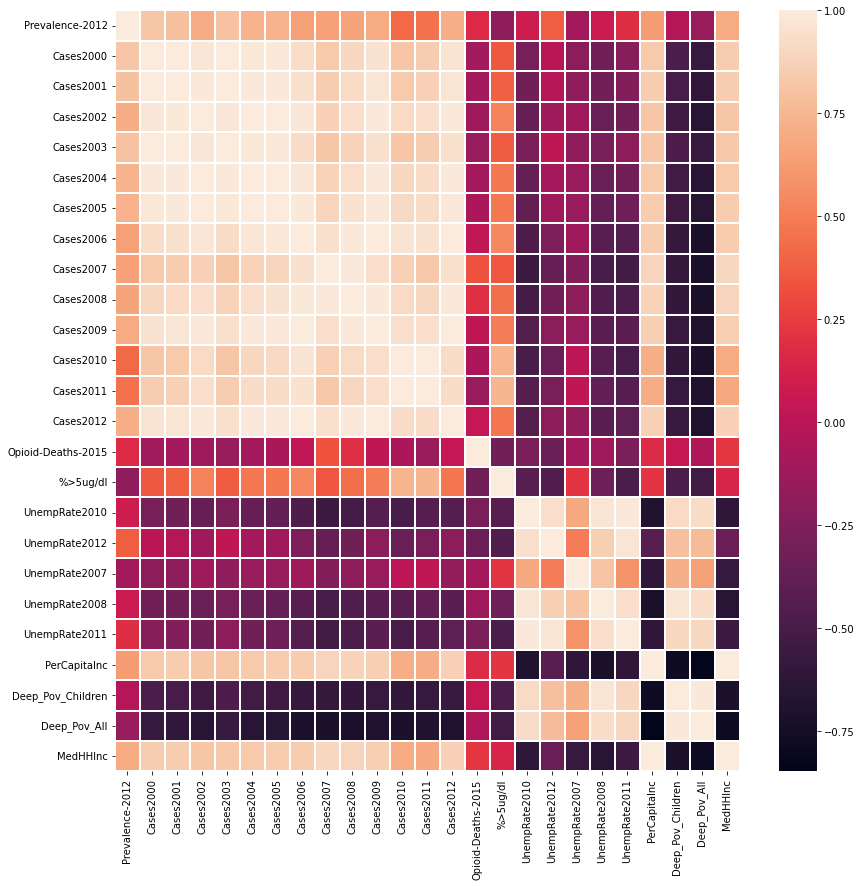

In [55]:
plt.figure(figsize=(14, 14))
sns.heatmap(addm_corr_mtx, annot=False, linewidths=0.1, linecolor='white')

In [56]:
addm_corr_mtx['Prevalence-2012']

Prevalence-2012       1.000000
Cases2000             0.813554
Cases2001             0.796436
Cases2002             0.700468
Cases2003             0.804311
Cases2004             0.731199
Cases2005             0.729350
Cases2006             0.641312
Cases2007             0.653222
Cases2008             0.666250
Cases2009             0.691327
Cases2010             0.418861
Cases2011             0.447592
Cases2012             0.710872
Opioid-Deaths-2015    0.166373
%>5ug/dl             -0.182018
UnempRate2010         0.087714
UnempRate2012         0.376841
UnempRate2007        -0.092103
UnempRate2008         0.072240
UnempRate2011         0.188897
PerCapitaInc          0.629077
Deep_Pov_Children    -0.020083
Deep_Pov_All         -0.142282
MedHHInc              0.696193
Name: Prevalence-2012, dtype: float64

---

## Medicaid

In [57]:
medi_data = [
    core['medi'], lyme, opio, lead, econ
]
medi_corr = pd.concat(medi_data, axis=1)

In [58]:
medi_corr = medi_corr.dropna()

In [59]:
medi_corr_mtx = medi_corr.corr()

<AxesSubplot:>

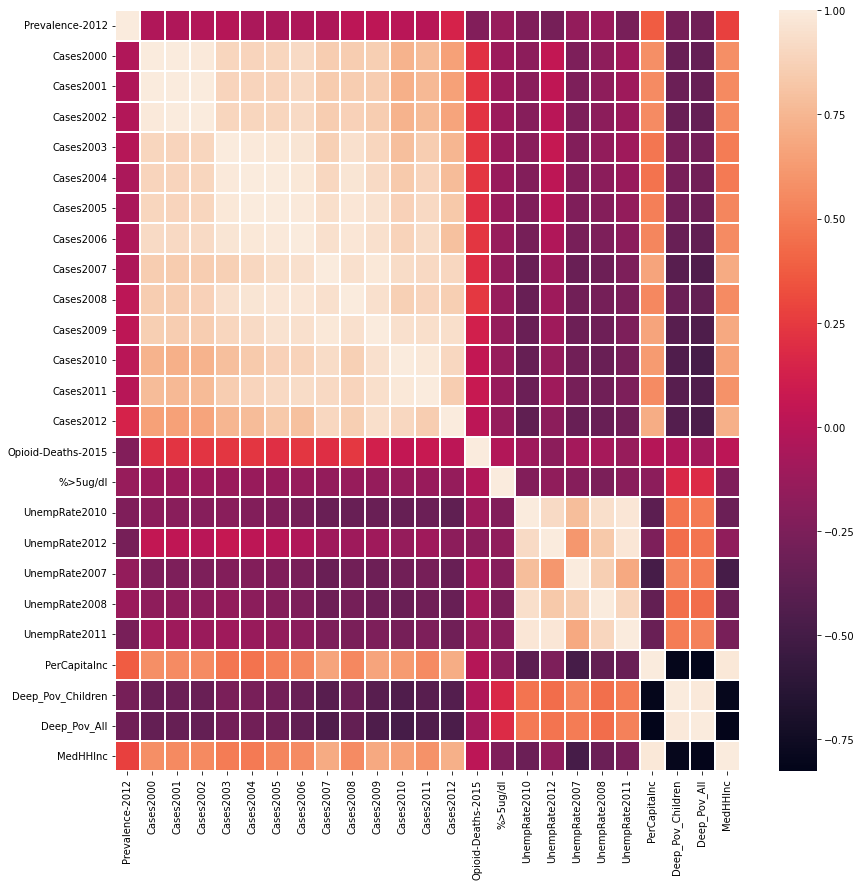

In [61]:
plt.figure(figsize=(14, 14))
sns.heatmap(medi_corr_mtx, annot=False, linewidths=0.1, linecolor='white')

In [62]:
medi_corr_mtx['Prevalence-2012']

Prevalence-2012       1.000000
Cases2000            -0.034546
Cases2001            -0.039098
Cases2002            -0.023315
Cases2003            -0.006789
Cases2004            -0.054788
Cases2005            -0.059232
Cases2006            -0.045272
Cases2007            -0.045871
Cases2008             0.018270
Cases2009             0.022678
Cases2010             0.003848
Cases2011            -0.004501
Cases2012             0.143057
Opioid-Deaths-2015   -0.227419
%>5ug/dl             -0.137470
UnempRate2010        -0.239727
UnempRate2012        -0.275273
UnempRate2007        -0.150954
UnempRate2008        -0.122855
UnempRate2011        -0.270553
PerCapitaInc          0.376988
Deep_Pov_Children    -0.276181
Deep_Pov_All         -0.304632
MedHHInc              0.277251
Name: Prevalence-2012, dtype: float64

---

## National Survey of Children's Health

In [63]:
nsch_data = [
    core['nsch'], lyme, opio, lead, econ
]
nsch_corr = pd.concat(nsch_data, axis=1)
nsch_corr = nsch_corr.dropna()
nsch_corr_mtx = nsch_corr.corr()

<AxesSubplot:>

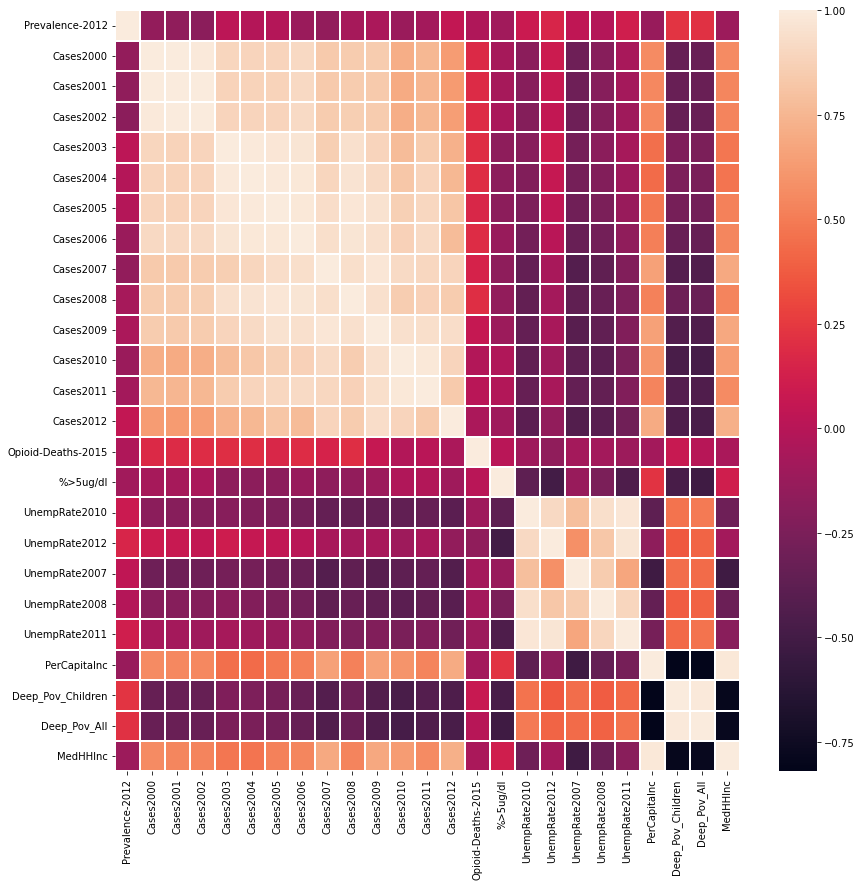

In [64]:
plt.figure(figsize=(14, 14))
sns.heatmap(nsch_corr_mtx, annot=False, linewidths=0.1, linecolor='white')

In [65]:
nsch_corr_mtx['Prevalence-2012']

Prevalence-2012       1.000000
Cases2000            -0.145643
Cases2001            -0.164422
Cases2002            -0.185082
Cases2003             0.020817
Cases2004            -0.015985
Cases2005            -0.012349
Cases2006            -0.120006
Cases2007            -0.155471
Cases2008            -0.073331
Cases2009            -0.051349
Cases2010            -0.119275
Cases2011            -0.086740
Cases2012             0.052044
Opioid-Deaths-2015   -0.036946
%>5ug/dl             -0.094429
UnempRate2010         0.083333
UnempRate2012         0.158947
UnempRate2007         0.038698
UnempRate2008        -0.012454
UnempRate2011         0.114762
PerCapitaInc         -0.130365
Deep_Pov_Children     0.225949
Deep_Pov_All          0.212100
MedHHInc             -0.113134
Name: Prevalence-2012, dtype: float64

---

## Special Education Child Count

In [66]:
sped_data = [
    core['sped'], lyme, opio, lead, econ
]
sped_corr = pd.concat(sped_data, axis=1)
sped_corr = sped_corr.dropna()
sped_corr_mtx = sped_corr.corr()

<AxesSubplot:>

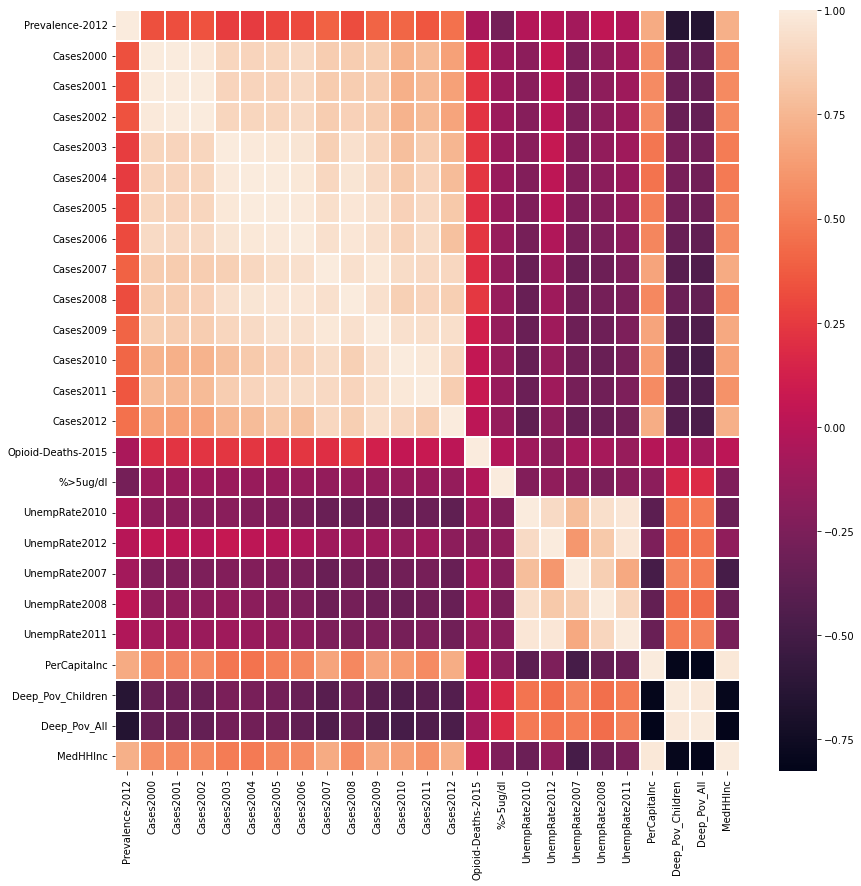

In [67]:
plt.figure(figsize=(14, 14))
sns.heatmap(sped_corr_mtx, annot=False, linewidths=0.1, linecolor='white')

In [68]:
sped_corr_mtx['Prevalence-2012']

Prevalence-2012       1.000000
Cases2000             0.333221
Cases2001             0.326581
Cases2002             0.337202
Cases2003             0.264658
Cases2004             0.257301
Cases2005             0.289756
Cases2006             0.314059
Cases2007             0.400290
Cases2008             0.318999
Cases2009             0.407322
Cases2010             0.407777
Cases2011             0.355496
Cases2012             0.455593
Opioid-Deaths-2015   -0.058043
%>5ug/dl             -0.284220
UnempRate2010        -0.017278
UnempRate2012        -0.000014
UnempRate2007        -0.089911
UnempRate2008         0.029850
UnempRate2011        -0.032451
PerCapitaInc          0.698424
Deep_Pov_Children    -0.635178
Deep_Pov_All         -0.653649
MedHHInc              0.716561
Name: Prevalence-2012, dtype: float64

---

Is there really any correlation at all?

In [72]:
addm_out = addm_corr_mtx['Prevalence-2012']
medi_out = medi_corr_mtx['Prevalence-2012']
nsch_out = nsch_corr_mtx['Prevalence-2012']
sped_out = sped_corr_mtx['Prevalence-2012']

joined = pd.concat([addm_out, medi_out, nsch_out, sped_out], axis=1)

In [74]:
joined.columns = ['p_2012_addm', 'p_2012_medi', 'p_2012_nsch', 'p_2012_sped']

In [75]:
joined.head()

,p_2012_addm,p_2012_medi,p_2012_nsch,p_2012_sped
Prevalence-2012,1.000000,1.000000,1.000000,1.000000
Cases2000,0.813554,-0.034546,-0.145643,0.333221
Cases2001,0.796436,-0.039098,-0.164422,0.326581
Cases2002,0.700468,-0.023315,-0.185082,0.337202
Cases2003,0.804311,-0.006789,0.020817,0.264658


In [76]:
joined.to_csv('corr_between_ds.csv')

In [77]:
joined.corr()

,p_2012_addm,p_2012_medi,p_2012_nsch,p_2012_sped
p_2012_addm,1.000000,0.631404,0.010978,0.847955
p_2012_medi,0.631404,1.000000,0.498799,0.815913
p_2012_nsch,0.010978,0.498799,1.000000,0.055418
p_2012_sped,0.847955,0.815913,0.055418,1.000000


<AxesSubplot:>

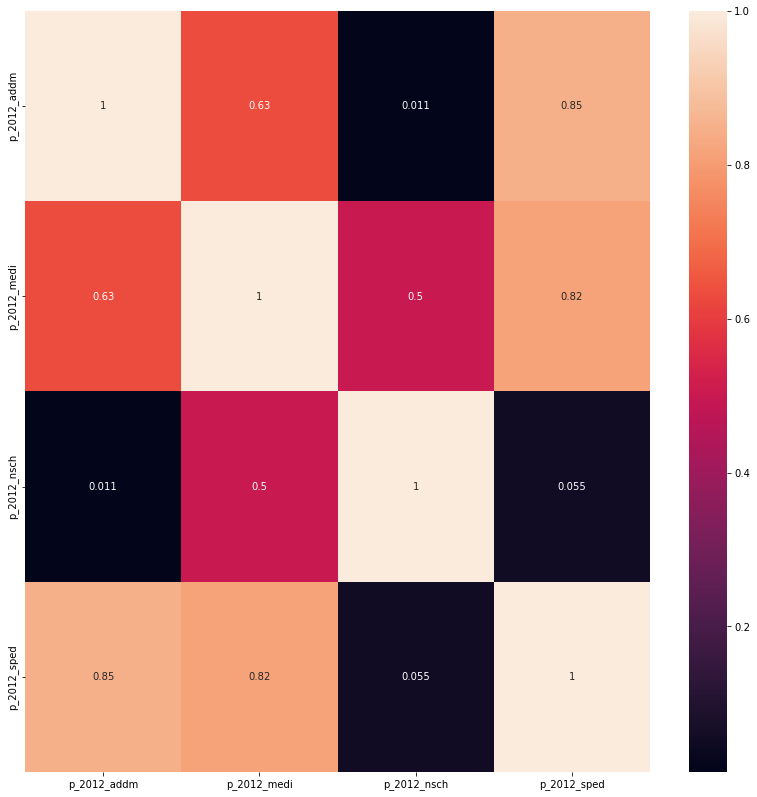

In [81]:
plt.figure(figsize=(14,14))
sns.heatmap(joined.corr(), annot=True)

In [84]:
jc = joined.corr()

In [86]:
jc.values.var()

0.13529833662227347